# **Online Payments Fraud Detection Dataset**

## **Introduction**

Every year there are millions of online payment fraud victims, and the costs for the companies can be huge. Being able to develop a fast and reliable fraud detection system can change drastically the financial performance of the business, and such a system heavily relies on historical data to understand how fraud works and be able to prevent it.

**Why online payments are the target?**

Online payments are a prime target for fraudsters as such payments only need the details which are stored digitally. It’s also easier to get away with it, because it’s so much harder for the seller to verify who is really making the purchase.

## **Research question**

1.  What type of online payments are the victims of fraudulent payment?
2.  What is the nature of a fraud online payment?
3.  What are the important features to detect fraudulent online payment?
4.  As fraud transactions are rare as compared to legitimate transactions so the dataset is naturally imbalanced. How to mitigate this problem?
5.  Comparison of performance of various supervised classification models and finding which model gets maximum benefit after target classes are balanced? 


## **Dataset and Data dictionary**

The [Online Payments Fraud Detection Dataset](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset) is downloaded from [kaggle](https://https://www.kaggle.com/datasets). The table contains 11 columns, that is 10 features with a target variable 'isFraud'. isFraud = 1 implies Fraud transaction and isFraud = 0 implies legitimate transfer.

The below column reference:

1.  *step:* represents a unit of time where 1 step equals 1 hour

2.  *type:* type of online transaction

3.  *amount:* the amount of the transaction

4.  *nameOrig:* customer starting the transaction

5.  *oldbalanceOrg:* balance before the transaction

6.  *newbalanceOrig:* balance after the transaction

7.  *nameDest:* recipient of the transaction

8.  *oldbalanceDest:* initial balance of recipient before the transaction

9.  *newbalanceDest:* the new balance of recipient after the transaction

10. ***isFraud:*** fraud transaction is our **target variable**
11. *isFlaggedFraud:* the flagged fraud online payments










## **Method/Strategy**
 
1. Importing and Cleaning the data
2. Performing exploratory data analysis on categorical and Continuous variables including target variables. Studying their distribution for both the class of target variable to understand the type of online payments where fraudulent mostly seen and its nature.
3. Feature engineering and preparing test, train data(20-80 split). Addressing target class imbalance, if we come across it(which most probably we will). Random Under sampling, Random Over Sampling and penalise algorithms will be used here.
4. Running Logistic Regression, KNN, Random Forest Classifier, Gradient Boost and SVM supervised learning models. Comparing their performance.
5. Important features will be plotted and explored from the best performing model.

## **1.0. Imports**

Begin by importing the libraries. The dataset in csv format is downloaded from Kaggle and stored in google drive. The dataset is imported and saved as payments.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
mount_path = '/content/drive/'
drive.mount(mount_path)
file_path = 'MyDrive/python_for_data_scientists/capstones/capstone_two/online_payment_fraud_detection_dataset.csv'
payments = pd.read_csv(mount_path + file_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **2.0. Data Exploration**

In [4]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


The dataset contains 11 columns and 6362620 rows. Out of 11 variables 5 of them are floating point variable, 3 of them are of integers type and 3 are object type.

In [6]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


There are some large online payments running upto 7 figures. Average time taken for payment is 243 steps, minimum time taken is 1 step, Maximun time taken is 743 steps and 75% of the payments happens in less than half of maximun transaction time. 

**2.1. Missing data**

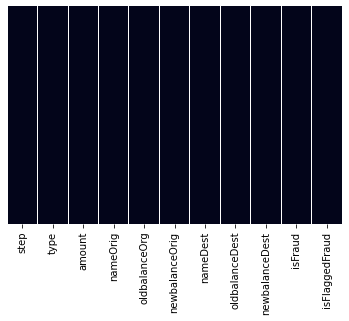

In [23]:
# Checking missing data

sns.heatmap(payments.isnull(),yticklabels=False,cbar=False)

From the heatmap above, we see No missing data, so moving on to EDA.

# **3.0. Exploratory Data Analysis**

We shall begin exploring difference in features and its distributions and study them against target classes that is 'isFraud'.

**3.1. Categorical variable**

Distribution of type of transaction for isFraud = 0 and isFraud = 1

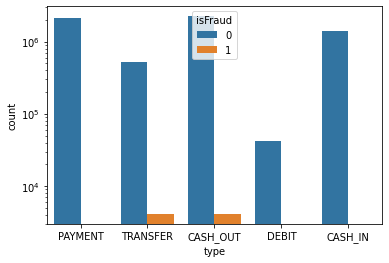

In [17]:
sns.countplot(x='type',data=payments,hue='isFraud')
plt.yscale('log')

Here y-scale of the countplot is tweaked for better visualisation of numbers. Cash out and payment are the most common types of transactions followed by cash in, transfer and Debit. As the number of fraud transactions is low, It's hard to understand the plot. So for better visualisation we normalise the occurrences with total occurrence per class.

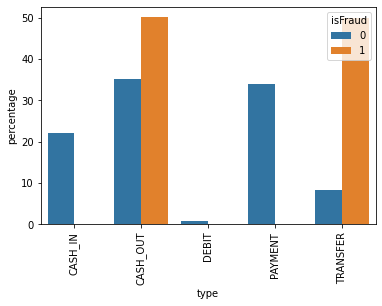

In [18]:
#Normalized occurrence
counts = (payments.groupby(['isFraud'])['type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('type'))
p = sns.barplot(x="type", y="percentage", hue="isFraud", data=counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

Percentage occurrences of cash_out and transfer types in fraud class are higher than those in non_fraud class.

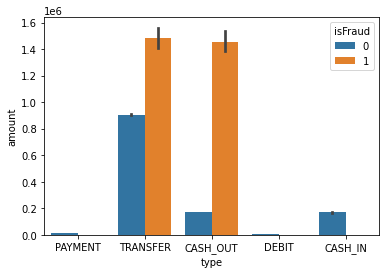

In [19]:
sns.barplot(x='type',y='amount', hue='isFraud',data=payments)

'Transfer' type for the legitimate has the maximum amount of money being transfered to the recipient. Cashout amount differs more between the target classes than transfer amount. In these two types fraudulent transactions are observed to have higher amounts.
Hence, *High amounts of payment and also most fraud payments are observed in Transfer and Cashout type of payments.*

**3.2. Continuous variables**

Now let us plot the histogram for continuous variables

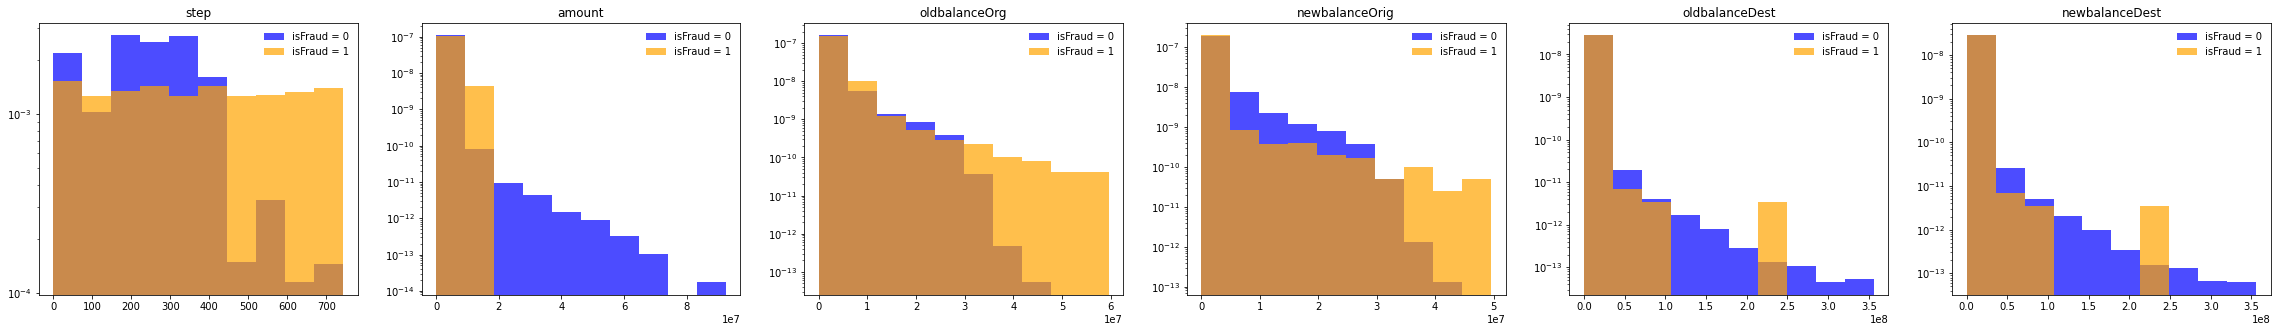

In [20]:
k = 1
plt.figure(figsize=(40,5))
for var in ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
  f0 = payments[var][payments['isFraud']==0]
  f1 = payments[var][payments['isFraud']==1]
  m0,x0 = np.min(list(f0)),np.max(list(f0))
  m1,x1 = np.min(list(f1)),np.max(list(f1))
  plt.subplot(1,6,k)
  plt.hist(f0,bins=10,range=[np.min([m0,m1]),np.max([x0,x1])],fc='blue',density=True,alpha=0.7,label='isFraud = 0')
  plt.yscale('log')
  plt.hist(f1,bins=10,range=[np.min([m0,m1]),np.max([x0,x1])],fc='orange',density=True,alpha=0.7,label='isFraud = 1')
  plt.title(var)
  plt.legend(frameon=False)
  plt.yscale('log')
  k = k+1
plt.show()


From the histograms above it is clear that all the feature distributions differ significantly between two target classes. Online payment time seemed to be uniform across the steps for fraud payments whereas it seemed to be concentrated below 400 steps for legitimate payments. Fraudulent online payments are concentrated at lower bins of amount, whereas it is uniformly decreased for legitimate payments. Both oldbalanceOrg and newbalanceOrig seem to have a higher rate of decrease for legitimate payments as compared to fraud payments. Entire range of oldbalanceDest and newbalanceDest is covered by legitimate payments but it is sparsely covered by fraud payments

**3.3. Target variable**

Here we plot histogram of target to understand the distribution of its class.

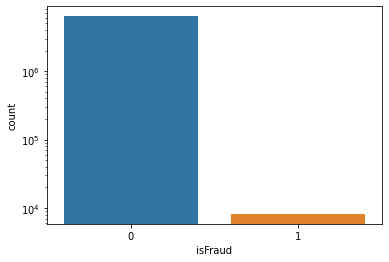

In [28]:
sns.countplot(x='isFraud',data=payments)
plt.yscale('log')

In [21]:
print("Number of not fraud cases: ", len(payments[payments['isFraud']==0]))
print("Number of fraud cases: ", len(payments[payments['isFraud']==1]))

Number of not fraud cases:  6354407
Number of fraud cases:  8213


The above graph and result indicates that the dataset is highly unbalanced. 8213 transactions have been tagged as fraudulent in the dataset, which is approx. 0.13% of the total number of transactions. Which makes sense because there are not many fraud transactions.


## **4.0. Feature Engineering**

In [8]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Type of online payment is one of the important features. So we use a one-hot encoding method to create dummies and concatenate newly created variables to the original dataframe.

In [9]:
type_new = pd.get_dummies(payments['type'],drop_first=True)

In [10]:
payments = pd.concat([payments,type_new],axis=1)

In [11]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


## **5.0. Preparing training and test set**

In [12]:
X = payments[['step','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = payments['isFraud']

In [13]:
from sklearn.model_selection import train_test_split

Here we will be splitting data into test and train sets. We will be keeping 80% data to train and 20% of the data to test.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

**5.1. Addressing class imbalance**

Highly imbalanced target class is not good. Hence we address this issue by introducing Random under sampling, Random over sampling and Penalise(Cost-Sensitive Training) approaches.

In [15]:
#### Random under sampling to equalize the positive and negative classes
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=23, replacement=True)# fit predictor and target variable
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [16]:
#### Random over sampling to equalize the positive and negative classes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=23)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [17]:
model_performance ={'Model':[],'Training Data':[],'G-mean score':[]}

## **6.0. Training and Testing Supervised Classification Models**

**6.1. Logistic Regression**

We begin by training and testing logistic regression on imbalanced data

In [18]:
## Training on imbalanced data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       0.37      0.43      0.40      1735

    accuracy                           1.00   1272524
   macro avg       0.68      0.72      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524



Printing Confusion matrix

In [20]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


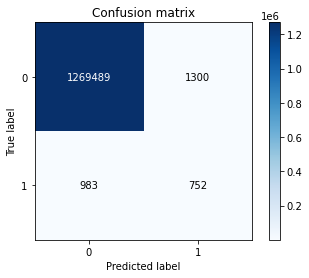

In [21]:
import itertools
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr,[0,1],False)

In [22]:
from imblearn.metrics import geometric_mean_score

gm_lr = geometric_mean_score(y_test, y_pred_lr)
model_performance['Model'].append('Logistic Regression')
model_performance['Training Data'].append('Imbalanced')
model_performance['G-mean score'].append(gm_lr)

Training and testing logistic regression on Random undersampled data

In [23]:
lr_rus = LogisticRegression()
lr_rus.fit(X_train_rus,y_train_rus)

y_pred_lr_rus = lr_rus.predict(X_test)


In [24]:
print(classification_report(y_test,y_pred_lr_rus))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270789
           1       0.01      0.89      0.03      1735

    accuracy                           0.92   1272524
   macro avg       0.51      0.91      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524



Confusion matrix, without normalization


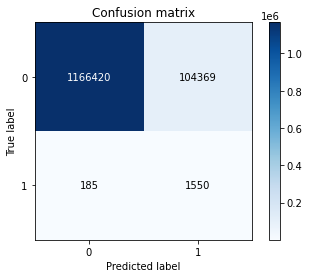

In [25]:
cm_lr_rus = confusion_matrix(y_test, y_pred_lr_rus)
plot_confusion_matrix(cm_lr_rus,[0,1],False)

In [26]:
gm_lr_rus = geometric_mean_score(y_test, y_pred_lr_rus)
model_performance['Model'].append('Logistic Regression')
model_performance['Training Data'].append('Random Under Sampling')
model_performance['G-mean score'].append(gm_lr_rus)

Training and testing logistic regression on Random oversampled data

In [27]:
lr_ros = LogisticRegression()
lr_ros.fit(X_train_ros,y_train_ros)

y_pred_lr_ros = lr_ros.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred_lr_ros))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270789
           1       0.01      0.90      0.03      1735

    accuracy                           0.91   1272524
   macro avg       0.51      0.90      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



Confusion matrix, without normalization


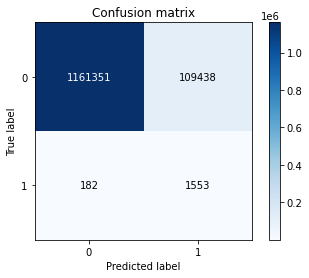

In [29]:
cm_lr_ros = confusion_matrix(y_test, y_pred_lr_ros)
plot_confusion_matrix(cm_lr_ros,[0,1],False)

In [30]:
gm_lr_ros = geometric_mean_score(y_test, y_pred_lr_ros)
model_performance['Model'].append('Logistic Regression')
model_performance['Training Data'].append('Random Over Sampling')
model_performance['G-mean score'].append(gm_lr_ros)

**6.2. KNN**

Training and testing KNN on original data

In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Build and train the model
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
# R squared of KNN trained model on test set
y_pred_knn = knn.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       0.91      0.64      0.75      1735

    accuracy                           1.00   1272524
   macro avg       0.96      0.82      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion matrix, without normalization


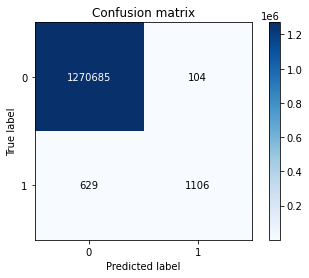

In [34]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn,[0,1],False)

In [35]:
gm_knn = geometric_mean_score(y_test, y_pred_knn)
model_performance['Model'].append('KNN')
model_performance['Training Data'].append('Imbalanced Data')
model_performance['G-mean score'].append(gm_knn)

Training and testing KNN on Random undersampled data

In [36]:
knn_rus = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_rus.fit(X_train_rus,y_train_rus)

KNeighborsClassifier(n_neighbors=10)

In [37]:
# R squared of KNN trained model on test set
y_pred_knn_rus = knn_rus.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred_knn_rus))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270789
           1       0.03      0.94      0.05      1735

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



Confusion matrix, without normalization


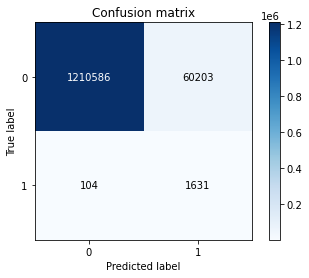

In [39]:
cm_knn_rus = confusion_matrix(y_test, y_pred_knn_rus)
plot_confusion_matrix(cm_knn_rus,[0,1],False)

In [40]:
gm_knn_rus = geometric_mean_score(y_test, y_pred_knn_rus)
model_performance['Model'].append('KNN')
model_performance['Training Data'].append('Random Under Sampling')
model_performance['G-mean score'].append(gm_knn_rus)

Training and testing KNN on Random oversampled data

In [41]:
knn_ros = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_ros.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_pred_knn_ros = knn_ros.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred_knn_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       0.44      0.82      0.57      1735

    accuracy                           1.00   1272524
   macro avg       0.72      0.91      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion matrix, without normalization


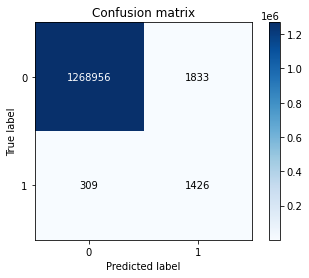

In [44]:
cm_knn_ros = confusion_matrix(y_test, y_pred_knn_ros)
plot_confusion_matrix(cm_knn_ros,[0,1],False)

In [45]:
gm_knn_ros = geometric_mean_score(y_test, y_pred_knn_ros)
model_performance['Model'].append('KNN')
model_performance['Training Data'].append('Random Over Sampling')
model_performance['G-mean score'].append(gm_knn_ros)

**6.3. Random Forest Classifier**

Training and testing Random Forest classifier model on original data

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10, max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred_rf=clf.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       1.00      0.28      0.44      1735

    accuracy                           1.00   1272524
   macro avg       1.00      0.64      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion matrix, without normalization


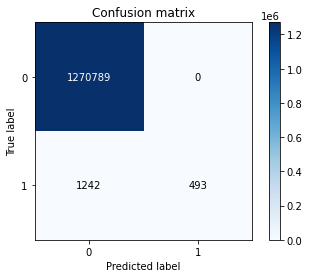

In [48]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf,[0,1],False)

In [49]:
gm_rf = geometric_mean_score(y_test, y_pred_rf)
model_performance['Model'].append('Random Forest')
model_performance['Training Data'].append('Imbalanced Data')
model_performance['G-mean score'].append(gm_rf)

Training and testing Random Forest classifier model on Random undersampled data

In [50]:
#Random under sampling

#Create a Gaussian Classifier
clf_rus=RandomForestClassifier(n_estimators=10, max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rus.fit(X_train_rus,y_train_rus)

# prediction on test set
y_pred_rf_rus=clf_rus.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred_rf_rus))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270789
           1       0.03      0.97      0.06      1735

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.52   1272524
weighted avg       1.00      0.95      0.98   1272524



Confusion matrix, without normalization


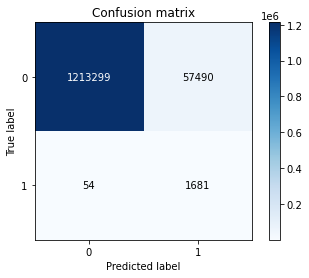

In [52]:
cm_rf_rus = confusion_matrix(y_test, y_pred_rf_rus)
plot_confusion_matrix(cm_rf_rus,[0,1],False)

In [53]:
gm_rf_rus = geometric_mean_score(y_test, y_pred_rf_rus)
model_performance['Model'].append('Random Forest')
model_performance['Training Data'].append('Random Under Sampling')
model_performance['G-mean score'].append(gm_rf_rus)

Training and testing Random Forest classifier model on Random oversampled data

In [54]:
#Random over sampling

#Create a Gaussian Classifier
clf_ros=RandomForestClassifier(n_estimators=10, max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_ros.fit(X_train_ros,y_train_ros)

# prediction on test set
y_pred_rf_ros=clf_ros.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred_rf_ros))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270789
           1       0.03      0.96      0.06      1735

    accuracy                           0.96   1272524
   macro avg       0.51      0.96      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



Confusion matrix, without normalization


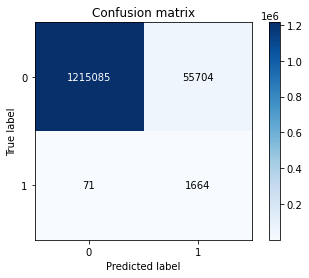

In [56]:
cm_rf_ros = confusion_matrix(y_test, y_pred_rf_ros)
plot_confusion_matrix(cm_rf_ros,[0,1],False)

In [57]:
gm_rf_ros = geometric_mean_score(y_test, y_pred_rf_ros)
model_performance['Model'].append('Random Forest')
model_performance['Training Data'].append('Random Over Sampling')
model_performance['G-mean score'].append(gm_rf_ros)

**Plotting Important features**

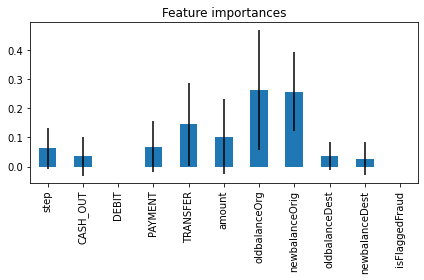

In [58]:
importances = clf_rus.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rus.estimators_], axis=0)
feature_names = [i for i in list(X_test.columns)]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

**6.4. Gradient Boosting model**

Training and testing Gradient Boosting model on original data

In [59]:
#original data with class imbalance

from sklearn import ensemble
params = {'n_estimators': 10,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

y_pred_gbm = clf.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       0.98      0.18      0.30      1735

    accuracy                           1.00   1272524
   macro avg       0.99      0.59      0.65   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion matrix, without normalization


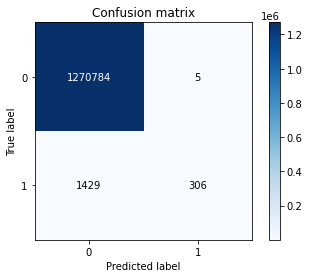

In [61]:
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plot_confusion_matrix(cm_gbm,[0,1],False)

In [62]:
gm_gbm = geometric_mean_score(y_test, y_pred_gbm)
model_performance['Model'].append('Gradient Boost Model')
model_performance['Training Data'].append('Imbalanced')
model_performance['G-mean score'].append(gm_gbm)

Training and testing Gradient boosting model on Random undersampled data

In [63]:
#Random under sampling

# Initialize and fit the model.
clf_gbm_rus = ensemble.GradientBoostingClassifier(**params)
clf_gbm_rus.fit(X_train_rus, y_train_rus)

y_pred_gbm_rus = clf_gbm_rus.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_gbm_rus))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270789
           1       0.03      0.88      0.05      1735

    accuracy                           0.96   1272524
   macro avg       0.51      0.92      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



Confusion matrix, without normalization


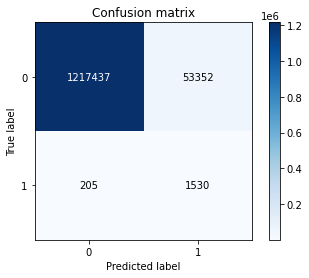

In [65]:
cm_gbm_rus = confusion_matrix(y_test, y_pred_gbm_rus)
plot_confusion_matrix(cm_gbm_rus,[0,1],False)

In [66]:
gm_gbm_rus = geometric_mean_score(y_test, y_pred_gbm_rus)
model_performance['Model'].append('Gradient Boost Model')
model_performance['Training Data'].append('Random Under Sampling')
model_performance['G-mean score'].append(gm_gbm_rus)

Training and testing Gradient boosting model on Random oversampled data

In [67]:
#Random over sampling

# Initialize and fit the model.
clf_gbm_ros = ensemble.GradientBoostingClassifier(**params)
clf_gbm_ros.fit(X_train_ros, y_train_ros)

y_pred_gbm_ros = clf_gbm_ros.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred_gbm_ros))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270789
           1       0.03      0.89      0.05      1735

    accuracy                           0.96   1272524
   macro avg       0.51      0.92      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



Confusion matrix, without normalization


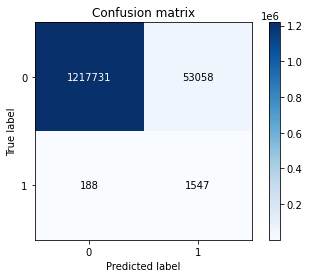

In [69]:
cm_gbm_ros = confusion_matrix(y_test, y_pred_gbm_ros)
plot_confusion_matrix(cm_gbm_ros,[0,1],False)

In [70]:
gm_gbm_ros = geometric_mean_score(y_test, y_pred_gbm_rus)
model_performance['Model'].append('Gradient Boost Model')
model_performance['Training Data'].append('Random Over Sampling')
model_performance['G-mean score'].append(gm_gbm_ros)

**6.5. Support Vector Mechine(SVM)**



Training and testing Support Vector Mechine model on original data

In [ ]:
#original data with class imbalance

# import SVC classifier
from sklearn.svm import LinearSVC

# instantiate classifier with default hyperparameters
svc = LinearSVC(random_state=23,max_iter=200) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred_svc=svc.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270789
           1       0.13      0.47      0.21      1735

    accuracy                           1.00   1272524
   macro avg       0.57      0.73      0.60   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion matrix, without normalization


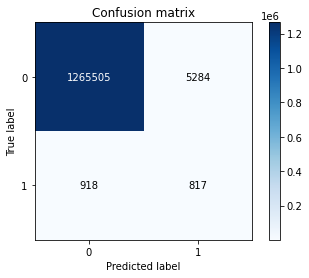

In [73]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
plot_confusion_matrix(cm_svc,[0,1],False)

In [74]:
gm_svc = geometric_mean_score(y_test, y_pred_svc)
model_performance['Model'].append('SVM')
model_performance['Training Data'].append('Imbalanced Data')
model_performance['G-mean score'].append(gm_svc)

Training and testing Support Vector Mechine model on Random under sampled data

In [75]:
#Random under sampling

# import SVC classifier
# instantiate classifier with default hyperparameters
svc_rus=LinearSVC(random_state=23,max_iter=200) 

# fit classifier to training set
svc_rus.fit(X_train_rus,y_train_rus)

# make predictions on test set
y_pred_svc_rus=svc_rus.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [76]:
print(classification_report(y_test,y_pred_svc_rus))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270789
           1       0.01      0.66      0.03      1735

    accuracy                           0.94   1272524
   macro avg       0.51      0.80      0.50   1272524
weighted avg       1.00      0.94      0.97   1272524



Confusion matrix, without normalization


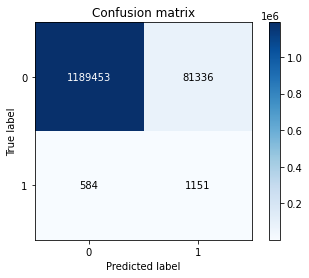

In [77]:
cm_svc_rus = confusion_matrix(y_test, y_pred_svc_rus)
plot_confusion_matrix(cm_svc_rus,[0,1],False)

In [78]:
gm_svc_rus = geometric_mean_score(y_test, y_pred_svc_rus)
model_performance['Model'].append('SVM')
model_performance['Training Data'].append('Random Under Sampling')
model_performance['G-mean score'].append(gm_svc_rus)

Training and testing Support Vector Mechine model on Random over sampled data

In [79]:
#Random over sampling

# import SVC classifier
# instantiate classifier with default hyperparameters
svc_ros=LinearSVC(random_state=23,max_iter=200) 

# fit classifier to training set
svc_ros.fit(X_train_ros,y_train_ros)

# make predictions on test set
y_pred_svc_ros=svc_ros.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [80]:
print(classification_report(y_test,y_pred_svc_ros))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93   1270789
           1       0.01      0.73      0.01      1735

    accuracy                           0.87   1272524
   macro avg       0.50      0.80      0.47   1272524
weighted avg       1.00      0.87      0.93   1272524



Confusion matrix, without normalization


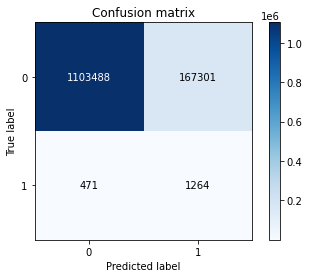

In [81]:
cm_svc_ros = confusion_matrix(y_test, y_pred_svc_ros)
plot_confusion_matrix(cm_svc_ros,[0,1],False)

In [82]:
gm_svc_ros = geometric_mean_score(y_test, y_pred_svc_ros)
model_performance['Model'].append('SVM')
model_performance['Training Data'].append('Random Over Sampling')
model_performance['G-mean score'].append(gm_svc_ros)

Training and testing Support Vector Mechine model on Penalized data

In [ ]:
#Penalize Algorithms (Cost-Sensitive Training)

# instantiate classifier with default hyperparameters
svc_pa=LinearSVC(random_state=23,max_iter=200,class_weight='balanced') 

# fit classifier to training set
svc_pa.fit(X_train,y_train)

# make predictions on test set
y_pred_svc_pa=svc_pa.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred_svc_pa))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1270789
           1       0.03      0.50      0.05      1735

    accuracy                           0.97   1272524
   macro avg       0.51      0.74      0.52   1272524
weighted avg       1.00      0.97      0.99   1272524



Confusion matrix, without normalization


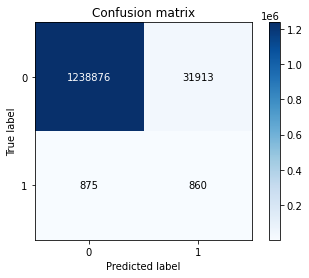

In [86]:
cm_svc_pa = confusion_matrix(y_test, y_pred_svc_pa)
plot_confusion_matrix(cm_svc_pa,[0,1],False)

In [87]:
gm_svc_pa = geometric_mean_score(y_test, y_pred_svc_pa)
model_performance['Model'].append('SVM')
model_performance['Training Data'].append('Penalize Loss')
model_performance['G-mean score'].append(gm_svc_pa)

## **7.0 Comparing all the models:**

Here we compare the performance of all five models with respected Imbalanced, Random Under Sampled, Random over Sampled, Penalize loss trained data and corresponding G-mean score of test data. 

In [89]:
pd.DataFrame(model_performance)                         

,Model,Training Data,G-mean score
0,Logistic Regression,Imbalanced,0.658017
1,Logistic Regression,Random Under Sampling,0.905538
2,Logistic Regression,Random Over Sampling,0.904443
3,KNN,Imbalanced Data,0.798381
4,KNN,Random Under Sampling,0.946321
5,KNN,Random Over Sampling,0.905934
6,Random Forest,Imbalanced Data,0.533057
7,Random Forest,Random Under Sampling,0.961792
8,Random Forest,Random Over Sampling,0.957621
9,Gradient Boost Model,Imbalanced,0.419962


G-mean score is a geometric mean of sensitivity (True Positive Rate) and specificity (True Negative Rate). It is higly effective in understanding the balance of model performance both for positives and negatives, and thus often used to depict classification model performance on imabalanced data. The table above contains the G-mean score of model performance on the test set for respective models and training data.
 
For the logistic regression model, the G-mean score of the test set trained with imbalanced target class is 0.65, after addressing the class imbalance there has been great improvement. G-mean scores of the test set tained with Random Under Sampling and Random Over sampling are 0.905 and 0.904 respectively. Which is nearly 40% improvement.
 
For KNN model, G-mean score of test set trained with imbalanced target class is 0.798, after addressing the class imbalance there has been significant improvement. G-mean scores of the test set trained with Random Under Sampling and Random Over sampling are 0.94 and 0.90 respectively. Which is nearly 15% improvement overall.
 
For the Random Forest model, the G-mean score of the test set trained with imbalanced target class is 0.53, after addressing the class imbalance there has been dramatic improvement. G-mean scores of the test set trained with Random Under Sampling and Random Over sampling are 0.96 and 0.95 respectively. Which is nearly 80% improvement. 
 
For the Gradient Boost model, the G-mean score of the test set trained with imbalanced target class is 0.41, after addressing the class imbalance there has been significant improvement. G-mean scores of the test set trained with Random Under Sampling and Random Over sampling are 0.919 and 0.919 respectively. Which is nearly 121% improvement overall.
 
For the SVM model, the G-mean score of the test set trained with imbalanced target class is 0.68, after addressing the class imbalance there has been slight improvement. G-mean scores of the test set trained with Random Under Sampling, Random Over sampling and penalise algorithm are 0.78, 0.79 and 0.69 respectively. The rate of improvement here is not as good as the rest of the models. It may be due to the model not converging fully. But we strongly believe that assigning higher number iteration there by achieving converging model could result in significant improvement in performance. 
 
On comparing performance of all 5 models on test set we see that **The Gradient Boost model has got the maximum benefit after addressing the class imbalance problem whereas the Random Forest classifier has the best performance with a G-mean score of 0.96.**

So it is safe to conclude that a Random forest classifier trained with Random under sampled data is a highly efficient model to classify Fraud online payments. As it is the best model so far, the feature importance has been plotted for this model. We see that Type, amount, OldbalanceOrg, NewbalanceOrig are the four most important features in detecting online fraud payments.

## **8.0. Conclusion**

1. Cash out and payment are the most common types of online payment.
2.  Most fraud payments and High amounts of payments are observed in Transfer and Cashout type of online payments.
3. Fraud online payments observed to have the following features;
   *  Roughly similar number of cases across all unit of time(steps),
   *  Lower amount per payment(<2Million)
   *   The range of oldbalanceDest and newbalanceDest is sparsely covered by fraud payments
   *   Both oldbalanceOrg and newbalanceOrig seem to have a higher rate of decrease for legitimate payments as compared to fraud payments.
4.  Amount, Type, OldbalanceOrg, NewbalanceOrig are the four most important features in detecting online fraud payments.
5.  The target class imbalance has been addressed using Random Under sampling, Random Over Sampling and Penalise techniques. Gradient Boost model is best benefited by it with more than 120% improvement with respect to imbalanced class performance.   
6.  Random forest classifier trained with Random under sampled data is a highly efficient model to classify Fraud online payments.


## **9.0. Practical Uses**

1.  *Reduces operational cost:* There’s no need to spend as much time and resources on reviewing every alerted transaction due to better accuracy and automated prediction.
2.  *Detects and prevents payment fraud more effectively:* Machine learning can quickly adapt to new behaviours of fraudulent transactions and helps to improve reactions to suspicious outliers.
3.  *Reduces false negatives*
4.  *Works with large datasets:* Machine learning is better than humans at processing large datasets and its prediction results improve as datasets grow.


## **10.0. Limitation and Future Research:**

**10.1. Limitations**

1.  The models which are trained on under sampled data see less information than in the original set of legitimate transactions. This affects the specificity of the model. 
2.  The sample chosen by random under-sampling may be a biassed sample. 
3.  The models which are trained on over sampled data may tend to overfit sometimes, since it replicates the minority class events.


**10.2. Future Research** 

1.  Having Larger dataset especially more fraud events can improve the performance.
2.  Application of Artificial Neural Networks to discover more effective features(non linear combinations of original features)
